In [1]:
import lightkurve as lk

In [2]:
search_result = lk.search_targetpixelfile('WASP-126', mission='TESS', sector=1)

In [3]:
search_result

#,observation,target_name,productFilename,distance
0,TESS Sector 1,25155310,tess2018206045859-s0001-0000000025155310-0120-s_tp.fits,0.0


In [5]:
tpf = search_result.download(quality_bitmask='default')

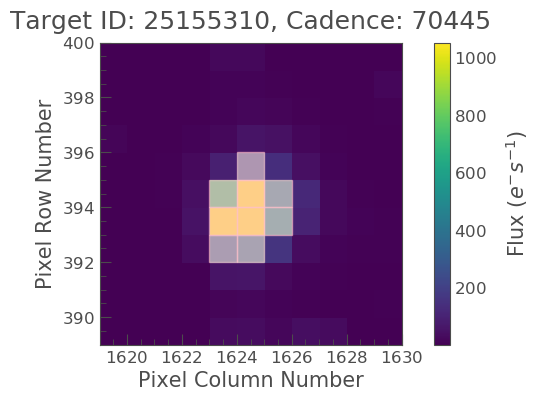

In [6]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask);

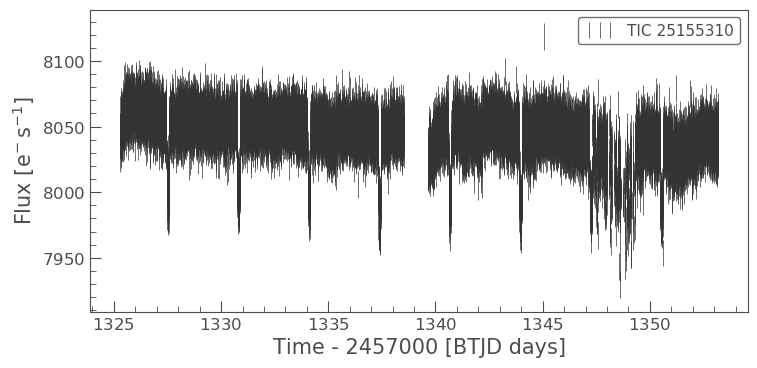

In [7]:
lc = tpf.to_lightcurve()
lc.errorbar();

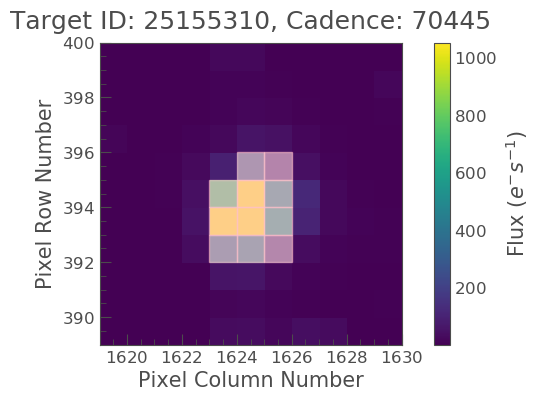

In [8]:
aperture_mask = tpf.create_threshold_mask(threshold=10)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

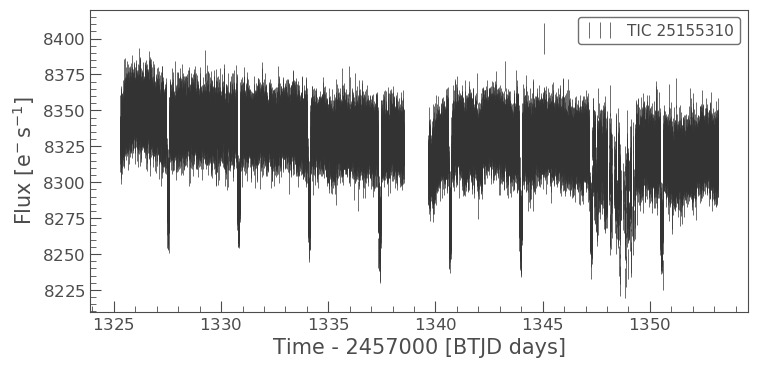

In [9]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.errorbar();

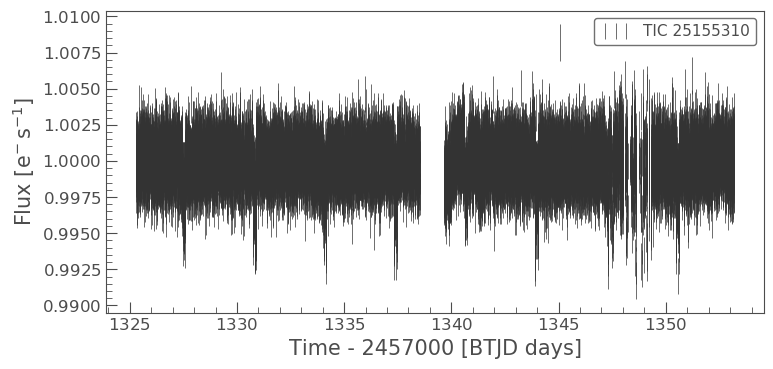

In [10]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

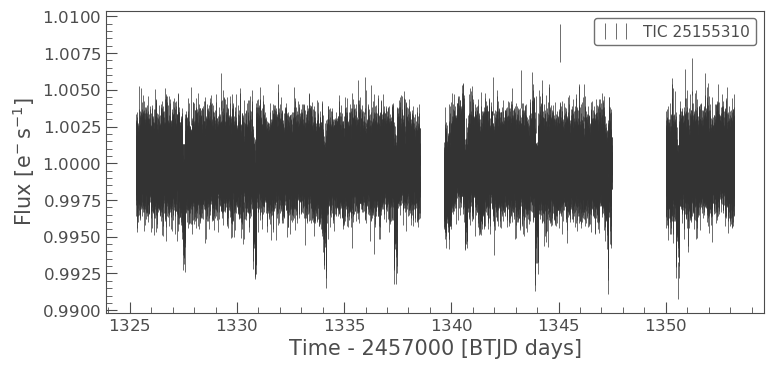

In [14]:
# Flag the times that are good quality
mask = (flat_lc.time < 1347.5) | (flat_lc.time > 1350)
masked_lc = flat_lc[mask]
masked_lc.errorbar();

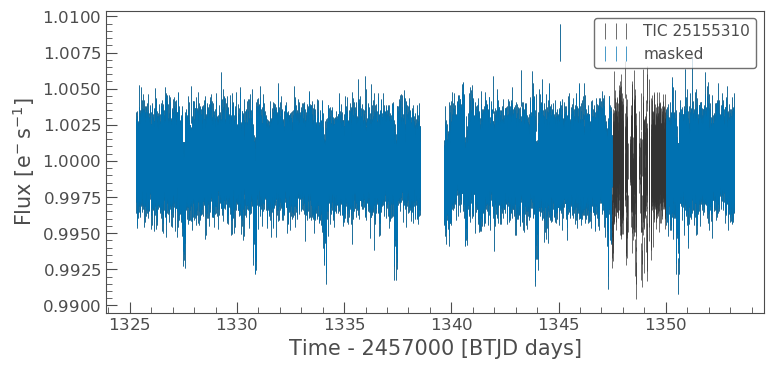

In [15]:
# First define the `matplotlib.pyplot.axes`
ax = flat_lc.errorbar()

# Pass that axis to the next plot
masked_lc.errorbar(ax=ax, label='masked');

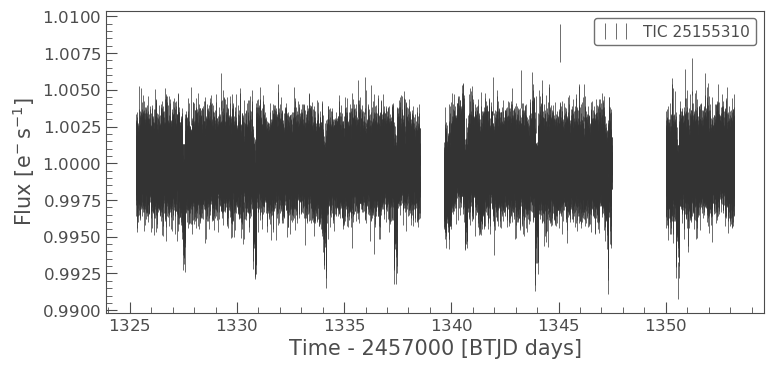

In [16]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();

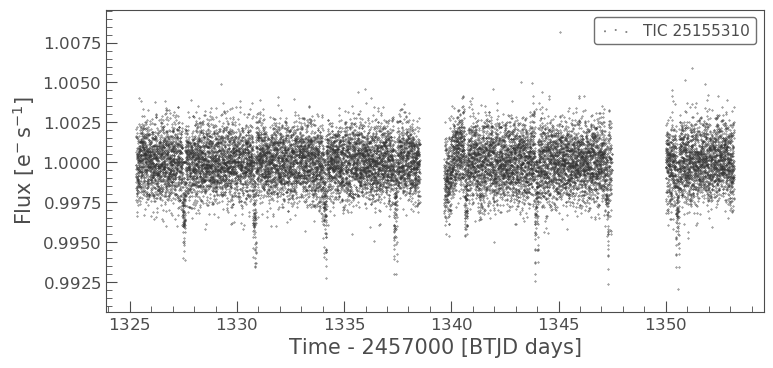

In [17]:
clipped_lc.scatter(s=0.1);

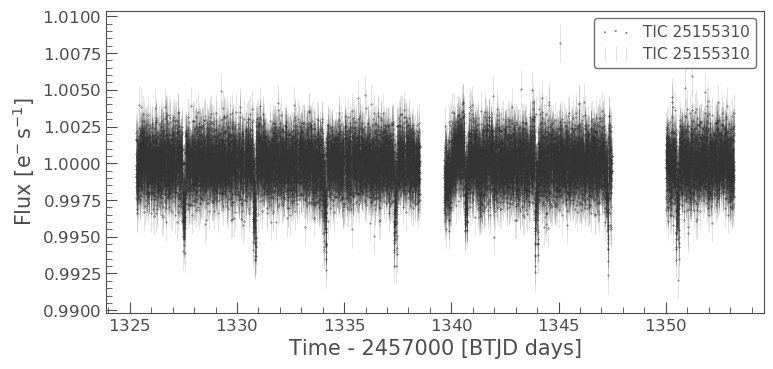

In [18]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);  # alpha determines the transparency

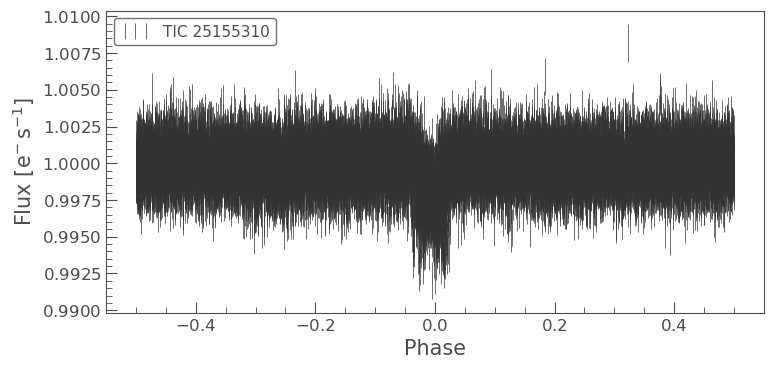

In [51]:
p = 3.3 #period of the planet's orbit
t0 = 1327.504 #start time of the transit (t zero)
folded_lc = clipped_lc.fold(p, t0)
folded_lc.errorbar();

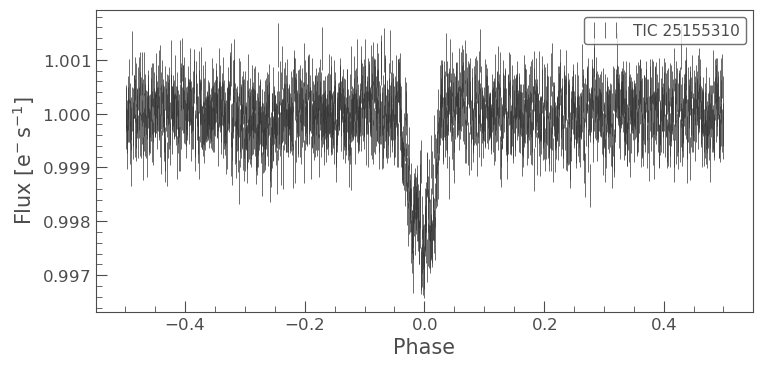

In [52]:
binned_lc = folded_lc.bin(binsize=10)  # Average 10 points per bin
binned_lc.errorbar();

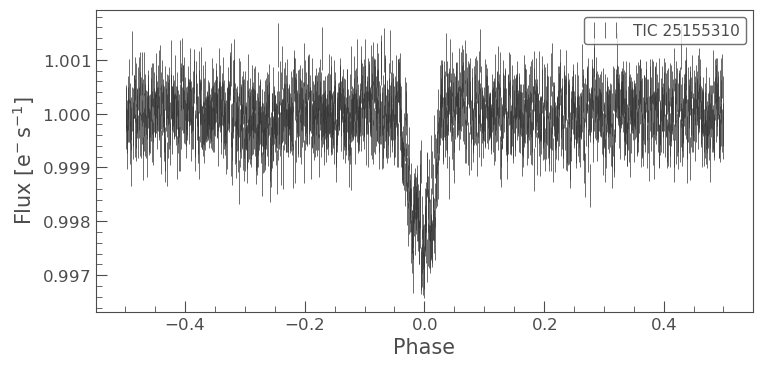

In [53]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
lc = lc[mask]
lc.remove_outliers(sigma=6).fold(p, t0).bin(binsize=10).errorbar();

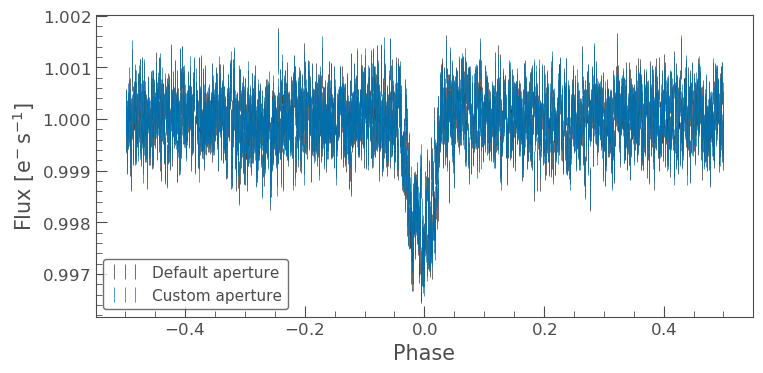

In [55]:
# Use the default
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten(window_length=1001)
lc = lc[mask].remove_outliers(6).fold(p, t0).bin(10)

# Use a custom aperture
custom_lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)

custom_mask = (custom_lc.time < 1347.5) | (custom_lc.time > 1350)
custom_lc = custom_lc[(custom_mask)].remove_outliers(6).fold(p, t0).bin(10)

ax = lc.errorbar(label='Default aperture')
custom_lc.errorbar(ax=ax, label='Custom aperture');

In [58]:
custom_lc.to_fits(path = "/Users/piperfrances/BSRC/code/reference_planet_WASP126.fits")

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1a2347b2d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a23230cd0>]

8bitT py2 test.ipynb
EightBitTransit Tests.ipynb
LC_to_Megastruct.ipynb
Noisy_Artifact_LCs_multiplied.ipynb
Piper.png
Subtracted_Artifacts_8bit.ipynb
TIC294970584/
TIC_294970584.fits
artifacts/
blogpost_word/
hlsp_eleanor_tess_ffi_tic294970584_s09_tess_v1.0.4_lc.fits
hlsp_eleanor_tess_ffi_tic294970584_s10_tess_v1.0.4_lc.fits
names/
py2 EightBitTransit Test.ipynb
reference_planet.ipynb
reference_planet_WASP126.fits
result_blogpost_word/
results_names/
results_subtract_artifacts/
subtract_artifacts/
